<a href="https://colab.research.google.com/github/M-Hajir/airbnb_eda/blob/main/AirBnBNewYork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB Data Exploratory Data Analysis

# 1.0) Project Overview

Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City

# 1.2) Problem Statement


#1.3) Objectives
#a) Main objective
The objective of this project is to learn data cleaning and exproratory data analysis

#b) Specific objectives

1. Perform data cleaning

2. Handle missing values

3. Handle outliers

4. Exploratory Data Analysis


# 1.4) Defining the metric of success

* Project will be considered successful if we are able to clean the dataset and gain insights about the data



#1.5) Understanding the context

The dataset we have consists of 25 variables and includes;


* **id**: Airbnb's unique identifier for the listing.

* **NAME**: The name or title of the listing.

* **host id**: Airbnb's unique identifier for the host/user of the listing.

* **host name**: The name of the host, usually just the first name(s).

* **neighbourhood group**: The geocoded neighborhood group based on latitude and longitude, using open or public digital shapefiles.

* **neighbourhood**: The neighborhood where the listing is located.

* **latitude**: The latitude coordinate of the listing's location using the WGS84 projection.

* **longitude**: The longitude coordinate of the listing's location using the WGS84 projection.

* **country**: The country where the listing is located.

* **country code**: The country code of the listing's location.

* **instant_bookable**: Indicates whether the guest can automatically book the listing without the host requiring to accept their booking request (true/false).

* **cancellation_policy**: The policy set by the host for cancellations.

* **room_type**: The type of room or accommodation available (e.g., Entire home/apt, Private room, Shared room, Hotel).

* **Construction year**: The year when the property was constructed.

* **price**: The daily price of the listing in the local currency.

* **service fee**: The additional fee charged for the service.

* **minimum_nights**: The minimum number of nights required for booking the listing.

* **number_of_reviews**: The total number of reviews the listing has received.

* **last_review**: The date of the last/newest review.

* **reviews_per_month**: The average number of reviews per month for the listing.

* **availability_365**: The number of days the listing is available for booking within the next 365 days.

* **house_rules**: The rules set by the host for guests staying at the listing.

* **license**: The license/permit/registration number associated with the listing.




# 1.6) Data Relevance and Validation

The data available is relevant for the intended analysis, it has **102,599** observations. More information can be found here:

[Kaggle.](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)



#2) Reading the Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# # reading the data
df = pd.read_csv("/content/drive/MyDrive/Data/Practice/Airbnb_Open_Data.csv",
                 index_col = 0, parse_dates = ['last review'], low_memory=False)
df.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


##2.1) Previewing the Data

In [ ]:
# previewing data
df.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.sample(7)

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
40668074,Nice bedroom - Lower East Side,17763507939,unconfirmed,Johanna,Manhattan,Lower East Side,40.72014,-73.98498,United States,US,...,$199,1.0,2.0,2015-08-24,0.04,4.0,1.0,0.0,NaN,NaN
7510744,A Unique studio apartment,8794010710,verified,Michael,Manhattan,Harlem,40.80843,-73.94125,United States,US,...,$177,2.0,210.0,2019-07-04,4.73,4.0,2.0,248.0,We require a signed lease as soon as we accept...,NaN
24962872,Queen Room,44590090019,unconfirmed,The Redford,Manhattan,Lower East Side,40.72110,-73.98930,United States,US,...,$197,1.0,0.0,NaT,NaN,2.0,2.0,162.0,NaN,NaN
8119378,A cozy room in Lower East Manhattan,18478785504,unconfirmed,Emily,Manhattan,Lower East Side,40.71209,-73.98794,United States,US,...,$31,28.0,2.0,2016-01-14,0.05,5.0,1.0,226.0,"- No smoking. - Maximum of 2 people - Sorry,...",NaN
56265579,Spacious room w/ own bathroom in the East Village,11727840795,verified,Fayth,Manhattan,East Village,40.73080,-73.98619,United States,US,...,$96,30.0,4.0,2018-08-31,0.13,3.0,2.0,0.0,- Rooftop deck - 1 Block from South Station,NaN
26728022,Prime Bushwick Spacious Studio,90107117694,verified,William,Brooklyn,Bushwick,40.68936,-73.92071,United States,US,...,$204,7.0,2.0,2019-06-30,2.00,3.0,1.0,15.0,Arrival time can be no later than 9:00PM unles...,NaN
35088740,Rockaway Beach Bungalow,58642071061,verified,Justin,Queens,Rockaway Beach,40.58483,-73.82318,United States,US,...,$70,2.0,29.0,2021-12-05,2.00,2.0,2.0,88.0,NaN,NaN


# 3) Understanding the data

In [ ]:
#Checking the number of entries:

print("The dataset contains {} rows, and {} columns".format(df.shape[0],
      df.shape[1]))

The dataset contains 102599 rows, and 25 columns


In [ ]:
# checking column names
df.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

**Observation** - The column names are not in the right format

In [ ]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   NAME                            102349 non-null  object        
 1   host id                         102599 non-null  int64         
 2   host_identity_verified          102310 non-null  object        
 3   host name                       102193 non-null  object        
 4   neighbourhood group             102570 non-null  object        
 5   neighbourhood                   102583 non-null  object        
 6   lat                             102591 non-null  float64       
 7   long                            102591 non-null  float64       
 8   country                         102067 non-null  object        
 9   country code                    102468 non-null  object        
 10  instant_bookable                102494 non-null  

**Observation** ;


i) The dataset contains null values


ii) Price column, Construction year, and host id are not in the correct data types

In [ ]:
df.loc[:1003689,"country code":"service fee"]

,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee
id,,,,,,,
1001254,US,False,strict,Private room,2020.0,$966,$193
1002102,US,False,moderate,Entire home/apt,2007.0,$142,$28
1002403,US,True,flexible,Private room,2005.0,$620,$124
1002755,US,True,moderate,Entire home/apt,2005.0,$368,$74
1003689,US,False,moderate,Entire home/apt,2009.0,$204,$41


In [ ]:
# getting summary statisctics for both categorical and numerical columns
pd.set_option('display.max_rows', 27)

df.describe(include = 'all')

<ipython-input-10-97506dc084b1>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,102349,1.025990e+05,102310,102193,102570,102583,102591.000000,102591.000000,102067,102468,...,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,50468,2
unique,61281,NaN,2,13190,7,224,NaN,NaN,1,1,...,231,NaN,NaN,2477,NaN,NaN,NaN,NaN,1976,1
top,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,US,...,$41,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,33,NaN,51200,881,43792,7937,NaN,NaN,102067,102468,...,526,NaN,NaN,2443,NaN,NaN,NaN,NaN,2712,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012-07-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2058-06-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,NaN,...,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254,NaN,NaN
std,NaN,2.853900e+10,NaN,NaN,NaN,NaN,0.055857,0.049521,NaN,NaN,...,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024,NaN,NaN
min,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,NaN,...,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,NaN,2.458333e+10,NaN,NaN,NaN,NaN,40.688740,-73.982580,NaN,NaN,...,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000,NaN,NaN


#4.) Cleaning the Data

### Handling Structural Issues

Column names are not in the correct format. To correct this we will change all to lower case and separated by underscores.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

Columns "price", and "service fee" are expected to be formatted as floats but they are formatted as string.

In [ ]:
# A function to identify non numeric rows in "balance", "creative arts", and "music"
def non_numeric_rows(data):
  non_numeric_df = df[pd.to_numeric(data, errors='coerce').isna()]
  pd.set_option('display.max_columns', None)
  return non_numeric_df.sample(7)

In [ ]:
non_numeric_rows(df["service_fee"])

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
37228350,Clean and Convenient Weekly Rental in Bed-Stuy,15177769244,verified,Alexander,Brooklyn,Bedford-Stuyvesant,40.69049,-73.95058,United States,US,True,strict,Entire home/apt,2005.0,$519,NaN,5.0,7.0,2021-05-08,0.26,2.0,1.0,283.0,NaN,NaN
45566975,Downtown Luxury 1 Bedroom 800 sq ft,24589341652,unconfirmed,Gigi,Manhattan,Battery Park City,40.71222,-74.01566,United States,US,True,strict,Entire home/apt,2006.0,$982,$196,7.0,4.0,2019-04-27,0.33,5.0,1.0,51.0,NO Smoking Pets Allowed with a $375 non refund...,NaN
18698133,"Paradise Garden, Spa, Steam & Massage Table #1...",42387767659,unconfirmed,Rasmus,Manhattan,Harlem,40.82263,-73.95181,United States,US,True,flexible,Entire home/apt,2022.0,$689,$138,3.0,14.0,2019-06-24,1.38,2.0,2.0,150.0,#NAME?,NaN
21957807,"Sharp Wall Street 1BR w/ Gym, Doorman, Roof de...",16646460392,verified,Blueground,Manhattan,Financial District,40.70497,-74.00746,United States,US,False,strict,Entire home/apt,2011.0,"$1,020",$204,30.0,1.0,2019-03-20,0.27,5.0,232.0,189.0,Sorry no smoking. Please treat this beautiful ...,NaN
54275089,Beautiful 1 bedroom in South Midtown Manhattan,1547574333,unconfirmed,William,Manhattan,Midtown,40.75230,-73.99024,United States,US,True,moderate,Entire home/apt,2015.0,$342,$68,5.0,7.0,2019-01-03,0.63,2.0,1.0,0.0,NaN,NaN
9611141,BK'S FINEST CLOSE 2 TRANSPORTATION-,4149175668,unconfirmed,Joyell,Brooklyn,Bushwick,40.69452,-73.92807,United States,US,True,strict,Private room,2005.0,$166,$33,1.0,72.0,2018-06-09,1.88,2.0,7.0,274.0,NaN,NaN
14753054,Heart of Bushwick,7274920779,verified,Bree,Brooklyn,Bushwick,40.70338,-73.91879,United States,US,False,strict,Entire home/apt,2008.0,$781,$156,15.0,3.0,2017-11-24,0.13,5.0,1.0,7.0,#NAME?,NaN


"service fee" column has "$" as prefix of numbers in some rows and "," separating some numbers



In [ ]:
non_numeric_rows(df["price"])

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
4269847,Central Harlem large beautiful studio,64531019014,unconfirmed,Mina,Manhattan,Harlem,40.81599,-73.94676,United States,US,True,flexible,Entire home/apt,2012.0,$156,$31,1.0,20.0,2019-05-22,0.36,3.0,3.0,418.0,NaN,NaN
5413108,Spacious Bedroom in Brooklyn,36507368872,unconfirmed,Morteza,Brooklyn,Crown Heights,40.66739,-73.95010,United States,US,False,flexible,Private room,2007.0,$444,$89,1.0,1.0,2015-05-21,0.02,4.0,1.0,128.0,"No smoking Smoking and the use of marijuana, ...",NaN
25554937,NYC Manhattan Private Room! Private Bathroom!!,29892048535,verified,Claudio,Manhattan,Harlem,40.81693,-73.94562,United States,US,False,strict,Private room,2005.0,$679,$136,5.0,1.0,2019-05-23,0.64,4.0,3.0,320.0,NaN,NaN
38605786,Bright Bushwick room with view of park,14287851214,verified,Wesley,Brooklyn,Bushwick,40.69210,-73.90849,United States,US,False,strict,Private room,2016.0,$596,$119,30.0,14.0,2020-03-06,0.42,2.0,2.0,0.0,NaN,NaN
48127438,Lovely Brownstone Garden Apartment,19801665348,unconfirmed,Marni,Brooklyn,Bedford-Stuyvesant,40.68720,-73.95231,United States,US,False,moderate,Entire home/apt,2007.0,"$1,011",$202,5.0,55.0,2019-07-03,1.44,1.0,1.0,100.0,Please be clean and respectful of the apartmen...,NaN
33371639,The Romaine Apartment in Queens,37177263235,verified,Romaine,Queens,Jamaica,40.68415,-73.78010,United States,US,True,moderate,Entire home/apt,2004.0,$320,$64,1.0,9.0,2022-01-03,1.94,5.0,1.0,347.0,NaN,NaN
28321960,Cozy Private Bedroom Just For You,1779050175,unconfirmed,Tim,Brooklyn,East Flatbush,40.65229,-73.95139,United States,US,False,strict,Private room,2012.0,$829,$166,1.0,0.0,NaT,NaN,4.0,1.0,178.0,NaN,NaN


"price" column has "$" as prefix of numbers in some rows and "," separating some numbers

In [ ]:
# removing the unwanted characters
df["service_fee"].replace(",", "", inplace=True, regex=True)
df["price"].replace(",", "", inplace=True, regex=True)
df["service_fee"] = df["service_fee"].str.strip("$")
df["price"] = df["price"].str.strip("$")

In [ ]:
# changing the datatypes of columns
df["service_fee"] = df["service_fee"].astype(float)
df["price"] = df["price"] .astype(float)

The "host id" column is formatted as a float but it is supposed to be a string.

In [ ]:
# changing the "host id" column datatype to string
df["host_id"] = df["host_id"].astype(str)

In [ ]:
# checking the info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   name                            102349 non-null  object        
 1   host_id                         102599 non-null  object        
 2   host_identity_verified          102310 non-null  object        
 3   host_name                       102193 non-null  object        
 4   neighbourhood_group             102570 non-null  object        
 5   neighbourhood                   102583 non-null  object        
 6   lat                             102591 non-null  float64       
 7   long                            102591 non-null  float64       
 8   country                         102067 non-null  object        
 9   country_code                    102468 non-null  object        
 10  instant_bookable                102494 non-null  

In [ ]:
df.head(2)

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


### Handling Missing Values

In [ ]:
# A function find proportion of missing value
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order
    data = data.reset_index()
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

missing_values(df)

,index,Missing Values,Percentage
0,license,102597,0.999981
1,house_rules,52131,0.508104
2,last_review,15893,0.154904
3,reviews_per_month,15879,0.154768
4,country,532,0.005185
5,availability_365,448,0.004367
6,minimum_nights,409,0.003986
7,host_name,406,0.003957
8,review_rate_number,326,0.003177
9,calculated_host_listings_count,319,0.003109


"license" column has ~99% missing values. There is no much we can gain from this column. So it is best to drop the column.

In [ ]:
# viewing the rows with values from the "license" column
license_values = df[df["license"].notna()]
license_values

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,US,True,strict,Private room,2010.0,702.0,140.0,1.0,1.0,2016-01-03,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,US,True,flexible,Private room,2010.0,702.0,140.0,1.0,1.0,2016-01-03,0.02,1.0,1.0,0.0,NaN,41662/AL


In [ ]:
# before dropping licence column and renaming the columns, we will make a copy
# of the original dataset
df_copy = df.copy(deep = True) # Modifications to the data of the copy will
                                # not be reflected in the original object
df_copy.head(3) #previewing the first three rows

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [ ]:
df.drop("license", axis=1, inplace=True)

In [ ]:
df.columns

Index(['name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

In [ ]:
missing_values(df)

,index,Missing Values,Percentage
0,house_rules,52131,0.508104
1,last_review,15893,0.154904
2,reviews_per_month,15879,0.154768
3,country,532,0.005185
4,availability_365,448,0.004367
5,minimum_nights,409,0.003986
6,host_name,406,0.003957
7,review_rate_number,326,0.003177
8,calculated_host_listings_count,319,0.003109
9,host_identity_verified,289,0.002817


The "house_rules" column has ~51% missing values. However, the data seems to show that this column records rules provided by the host and missing values mean the host provided none. To correct this we will fill with a palce holder "The host did not provide any house rules".

In [ ]:
df["house_rules"] = df["house_rules"].fillna("The host did not provide any house rules")

In [ ]:
missing_values(df)

,index,Missing Values,Percentage
0,last_review,15893,0.154904
1,reviews_per_month,15879,0.154768
2,country,532,0.005185
3,availability_365,448,0.004367
4,minimum_nights,409,0.003986
5,host_name,406,0.003957
6,review_rate_number,326,0.003177
7,calculated_host_listings_count,319,0.003109
8,host_identity_verified,289,0.002817
9,service_fee,273,0.002661


"reviews per month" rows with missing data mean that there was no review so we can fill with 0

In [ ]:
# filling the "last review" and "reviews per month" rows missing values with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [ ]:
missing_values(df)

,index,Missing Values,Percentage
0,last_review,15893,0.154904
1,country,532,0.005185
2,availability_365,448,0.004367
3,minimum_nights,409,0.003986
4,host_name,406,0.003957
5,review_rate_number,326,0.003177
6,calculated_host_listings_count,319,0.003109
7,host_identity_verified,289,0.002817
8,service_fee,273,0.002661
9,name,250,0.002437


In [ ]:
# total missing values
print("Total number of rows with missing data: ", df.isnull().any(axis=1).sum())
print("Prortion of rows with missing data: ", df.isnull().any(axis=1).sum()/len(df))

Total number of rows with missing data:  18715
Prortion of rows with missing data:  0.18240918527471028


In [ ]:
# droping missing values
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83884 entries, 1001254 to 6094094
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            83884 non-null  object        
 1   host_id                         83884 non-null  object        
 2   host_identity_verified          83884 non-null  object        
 3   host_name                       83884 non-null  object        
 4   neighbourhood_group             83884 non-null  object        
 5   neighbourhood                   83884 non-null  object        
 6   lat                             83884 non-null  float64       
 7   long                            83884 non-null  float64       
 8   country                         83884 non-null  object        
 9   country_code                    83884 non-null  object        
 10  instant_bookable                83884 non-null  object        

### Handling Construction Year Column

The "Construction year" column is formatted as a float. I would like to format it as int

In [ ]:
# changing the "Construction year" column datatype to int
df['construction_year'] = df['construction_year'].map(lambda x: int(x) if pd.notnull(x) else np.nan)

### Handling Duplicates

In [ ]:
# Identifying duplicate data
duplicate_rows = df[df.duplicated(keep=False)].sort_values(by="id")
duplicate_rows

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
id,,,,,,,,,,,,,,,,,,,,,,,,
6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,US,False,moderate,Entire home/apt,2008,105.0,21.0,30.0,2.0,2019-06-08,0.21,3.0,34.0,157.0,The host did not provide any house rules
6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,US,False,moderate,Entire home/apt,2008,105.0,21.0,30.0,2.0,2019-06-08,0.21,3.0,34.0,157.0,The host did not provide any house rules
6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,US,False,moderate,Entire home/apt,2008,285.0,57.0,30.0,6.0,2019-01-31,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you..."
6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,US,False,moderate,Entire home/apt,2008,285.0,57.0,30.0,6.0,2019-01-31,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you..."
6027266,ACADIA Spacious 2 Bedroom Apt - Close to Hospi...,95854111798,verified,Juliana,Manhattan,Upper East Side,40.76021,-73.96157,United States,US,False,moderate,Entire home/apt,2014,586.0,117.0,30.0,10.0,2018-11-18,0.22,5.0,34.0,211.0,No Smoking No Pets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35606797,Bright and Beautiful Top Floor Two Bedrooms,65331079885,unconfirmed,Frankie,Brooklyn,Carroll Gardens,40.68383,-73.99281,United States,US,True,moderate,Entire home/apt,2009,1027.0,205.0,30.0,18.0,2021-11-04,0.63,2.0,1.0,3.0,The host did not provide any house rules
35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,United States,US,True,strict,Private room,2015,141.0,28.0,30.0,1.0,2021-11-04,0.25,3.0,4.0,307.0,The host did not provide any house rules
35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,United States,US,True,strict,Private room,2015,141.0,28.0,30.0,1.0,2021-11-04,0.25,3.0,4.0,307.0,The host did not provide any house rules


In [ ]:
df.duplicated().sum()

466

In [ ]:
(df.duplicated(['host_id']).sum())/len(df)

0.005555290639454485

The data has 523 duplicated rows. There are ~0.5% duplicates.

In [ ]:
# dropping duplicated records
df.drop_duplicates(subset=["host_id"], keep="first", inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83418 entries, 1001254 to 57358028
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            83418 non-null  object        
 1   host_id                         83418 non-null  object        
 2   host_identity_verified          83418 non-null  object        
 3   host_name                       83418 non-null  object        
 4   neighbourhood_group             83418 non-null  object        
 5   neighbourhood                   83418 non-null  object        
 6   lat                             83418 non-null  float64       
 7   long                            83418 non-null  float64       
 8   country                         83418 non-null  object        
 9   country_code                    83418 non-null  object        
 10  instant_bookable                83418 non-null  object       

### Handling Outliers

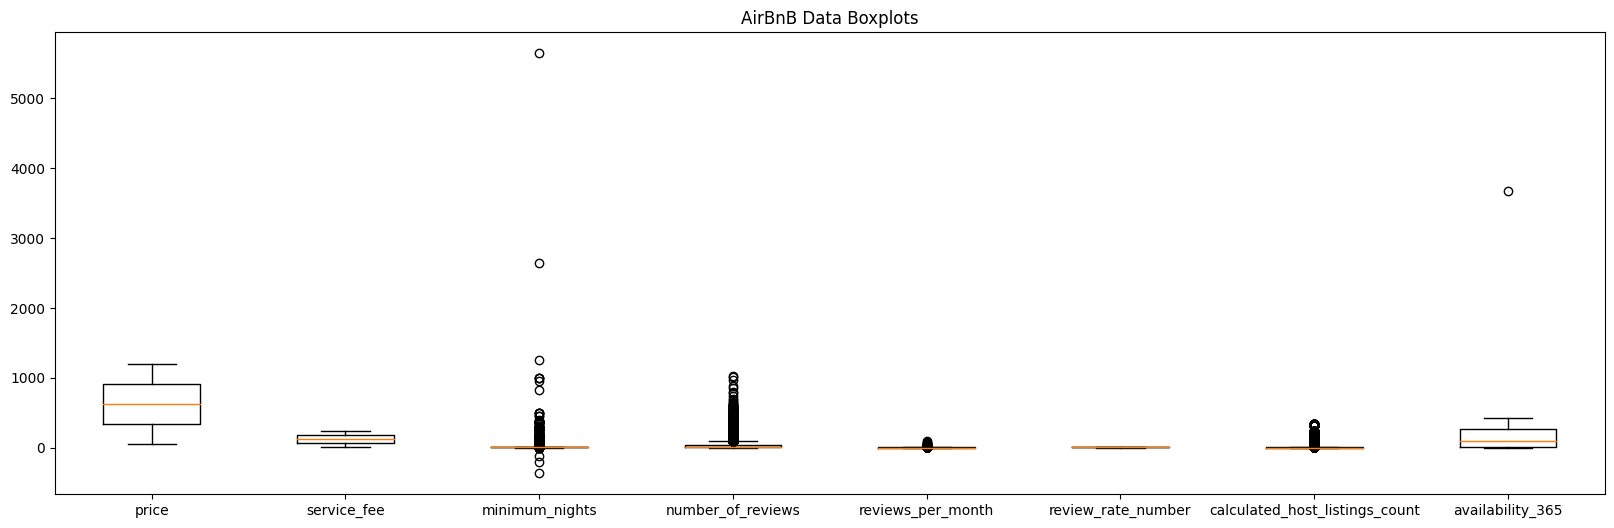

In [ ]:
float_columns = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count','availability_365']
fig, ax = plt.subplots(figsize=(20,6))
ax.boxplot(df[float_columns])
ax.set_xticks(np.arange(1, len(float_columns) + 1))
ax.set_xticklabels(float_columns)
ax.set_title("AirBnB Data Boxplots");

minimum nights column has extreme outliers

In [ ]:
# # Getting outliers
# def IQR_outliers(data, column):
#     """Simple function to identify and remove outliers using IQR"""
#     # get Q1 and Q2
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     # calculate IQR
#     IQR = Q3-Q1
#     # identify ouliers (returns True if an outlier)
#     out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

#     # identify the outlier using index
#     outliers_list = list(out[out==True].index)
#     # identify the actual outliers using index
#     outliers = []
#     for val in outliers_list:
#         outliers.append(data[column][val])


#     return outliers, Q1, Q3, IQR


In [ ]:
# # Dealing with outliers using IQR
# def IQR_remove_outliers(data, column):
#     """Simple function to remove the ouliers"""
#     # get values from previous function
#     identify = IQR_outliers(data, column)
#     Q1 = identify[1]
#     Q3 = identify[2]
#     IQR = identify[3]
#     # remove the outliers
#     df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

#     return df

In [ ]:
# # Removing outliers in
# for i in scores_columns:
#   df = IQR_remove_outliers(df, i)

## Previewing cleaned data

In [ ]:
df.head()

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
id,,,,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...


In [ ]:
df.tail()

,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
id,,,,,,,,,,,,,,,,,,,,,,,,
57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,False,flexible,Private room,2018,822.0,164.0,1.0,9.0,2019-04-25,0.91,3.0,1.0,0.0,I have other roommates so be respectful of that.
57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,True,moderate,Private room,2015,455.0,91.0,4.0,36.0,2018-06-27,1.28,1.0,1.0,0.0,The host did not provide any house rules
57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,True,flexible,Private room,2020,1078.0,216.0,1.0,58.0,2019-06-10,2.08,5.0,2.0,120.0,- $150 Pet Fee - 14.45% Tax Will be adjusted i...
57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,False,moderate,Private room,2007,103.0,21.0,7.0,40.0,2019-06-23,1.51,1.0,5.0,148.0,The host did not provide any house rules
57358028,"Room in Queens, NY, near LGA.",56457739998,verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,United States,US,True,strict,Private room,2022,982.0,196.0,1.0,239.0,2019-06-29,8.58,2.0,2.0,361.0,1. Please clean-up after yourself in the kitch...


In [ ]:
# previewing neighbourhood group
df["neighbourhood_group"].value_counts()

Brooklyn         34639
Manhattan        34569
Queens           11126
Bronx             2267
Staten Island      816
brookln              1
Name: neighbourhood_group, dtype: int64

In [ ]:
# previewing country
df["country"].value_counts()

United States    83418
Name: country, dtype: int64

In [ ]:
# previewing country code
df["country_code"].value_counts()

US    83418
Name: country_code, dtype: int64

In [ ]:
# previewing instant_bookable
df["instant_bookable"].value_counts()

False    41900
True     41518
Name: instant_bookable, dtype: int64

In [ ]:
# previewing cancellation_policy
df["cancellation_policy"].value_counts()

moderate    27949
strict      27772
flexible    27697
Name: cancellation_policy, dtype: int64

In [ ]:
# previewing room type
df["room_type"].value_counts()

Entire home/apt    44167
Private room       37497
Shared room         1646
Hotel room           108
Name: room_type, dtype: int64

In [ ]:
# previewing Construction year
df["construction_year"].value_counts()

2006    4291
2008    4277
2014    4263
2019    4255
2015    4220
2010    4191
2005    4183
2017    4166
2009    4165
2012    4161
2003    4158
2011    4154
2018    4154
2020    4149
2007    4143
2021    4128
2022    4126
2016    4118
2004    4094
2013    4022
Name: construction_year, dtype: int64

In [ ]:
# previewing host_identity_verified
df["host_identity_verified"].value_counts()

unconfirmed    41723
verified       41695
Name: host_identity_verified, dtype: int64

In [ ]:
# Correcting Spelling mistake brookln , manhatan
df.replace(to_replace='brookln',value='Brooklyn',inplace=True)
df.replace(to_replace='manhatan',value='Manhattan',inplace=True)
df['neighbourhood_group'].value_counts()

Brooklyn         34640
Manhattan        34569
Queens           11126
Bronx             2267
Staten Island      816
Name: neighbourhood_group, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83418 entries, 1001254 to 57358028
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            83418 non-null  object        
 1   host_id                         83418 non-null  object        
 2   host_identity_verified          83418 non-null  object        
 3   host_name                       83418 non-null  object        
 4   neighbourhood_group             83418 non-null  object        
 5   neighbourhood                   83418 non-null  object        
 6   lat                             83418 non-null  float64       
 7   long                            83418 non-null  float64       
 8   country                         83418 non-null  object        
 9   country_code                    83418 non-null  object        
 10  instant_bookable                83418 non-null  bool         

## Exploratory Data Analysis

### Univarite Analysis

In [ ]:
# Adding total bill column (price + service fee)
df['total_bill'] = df["service_fee"] + df["price"]

In [ ]:
# Average total bill by neighbourhood_group
df.groupby(["neighbourhood_group"])['total_bill'].mean().sort_values()

neighbourhood_group
Staten Island    746.567402
Manhattan        748.170239
Brooklyn         752.880225
Bronx            756.247905
Queens           756.547277
Name: total_bill, dtype: float64

Queens is on average the most expensive to book an AirBnB

In [ ]:
df.describe()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,total_bill
count,83418.000000,83418.000000,83418.000000,83418.000000,83418.000000,83418.000000,83418.00000,83418.000000,83418.000000,83418.000000,83418.000000,83418.000000
mean,40.727353,-73.948502,2012.488719,626.205064,125.242178,7.412585,32.27910,1.377507,3.278729,7.032199,141.787084,751.447242
std,0.056326,0.050346,5.760835,331.790033,66.361543,28.134698,51.96101,1.751018,1.283628,29.550397,133.928556,398.151073
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.00000,0.000000,1.000000,1.000000,-10.000000,60.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.00000,0.220000,2.000000,1.000000,6.000000,408.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.00000,0.740000,3.000000,1.000000,101.000000,750.000000
75%,40.762597,-73.930820,2017.000000,914.000000,183.000000,5.000000,38.00000,2.010000,4.000000,2.000000,266.000000,1097.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.00000,90.000000,5.000000,332.000000,3677.000000,1440.000000


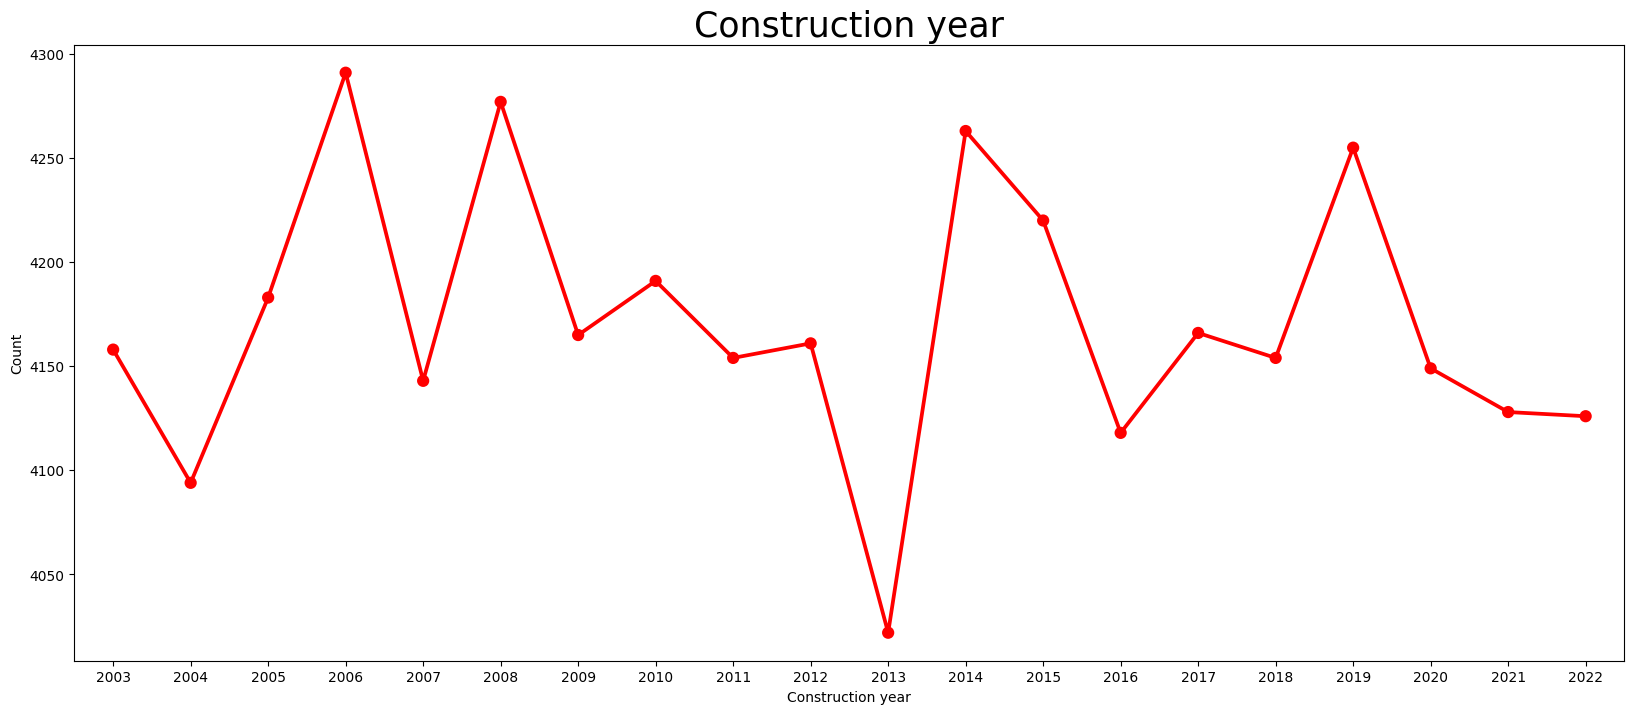

In [ ]:
# construction_year unit counts line graph
year = df["construction_year"].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index, y=year.values, color='red')
plt.xlabel("Construction year")
plt.ylabel("Count")
plt.title("Construction year", size=25);

The data set has houses constructed between 2003 and 2022. 2013 was the year with least buildings.

Text(0.5, 1.0, 'Neighbourhood Group')

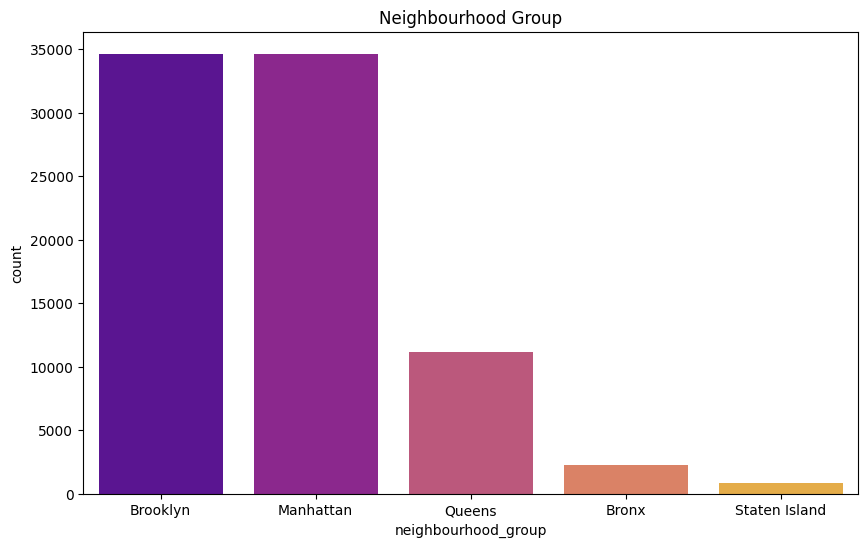

In [ ]:
# neighbourhood group countplot
plt.figure(figsize=(10,6))
sns.countplot(data = df, x="neighbourhood_group", palette="plasma")
plt.title('Neighbourhood Group')

Brooklyn has the most units




### Bivariate Analysis

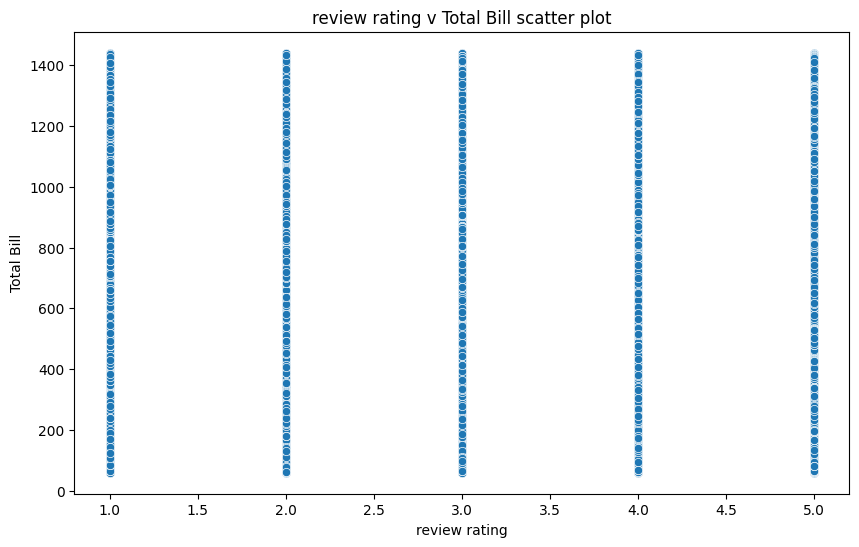

In [ ]:
# balance v Total Score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x = df["review_rate_number"],y = df["total_bill"])
plt.title("review rating v Total Bill scatter plot")
plt.xlabel("review rating")
plt.ylabel("Total Bill");

In [ ]:
np.corrcoef(df["review_rate_number"],df["total_bill"])[1,0]

-0.0074687429179913995

There is no linear relationship between reviews rating and amount charged for the AirBnB unit

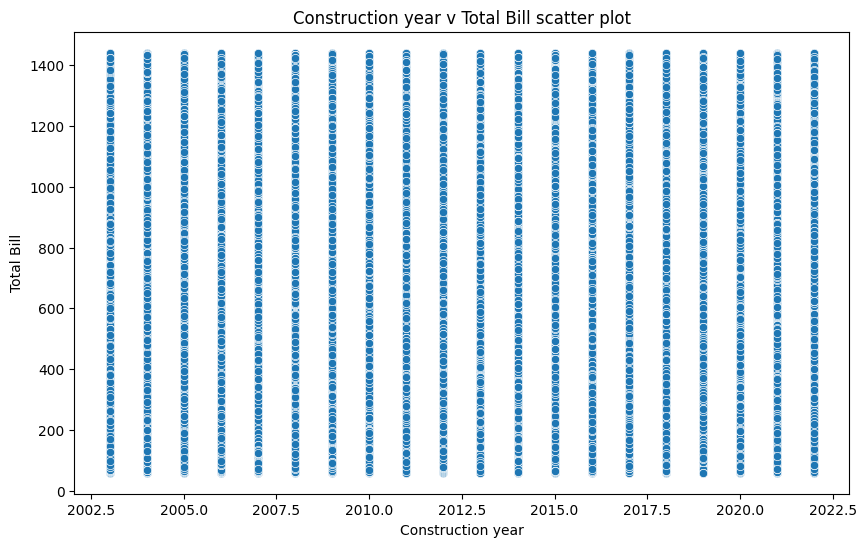

In [ ]:
# balance v Total Score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x = df["construction_year"],y = df["total_bill"])
plt.title("Construction year v Total Bill scatter plot")
plt.xlabel("Construction year")
plt.ylabel("Total Bill");

There is no linear relationship between construction year and amount charged for the AirBnB unit